# [CDAF] Atividade 6 - Representações

## Nome e matrícula
Nome: Bernardo Vale dos Santos Bento

Matrícula: 2023002065

In [1]:
import sys

if 'google.colab' in sys.modules:
  %pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 1.6 MB/s eta 0:00:00


## Introdução
Nessa atividade, vamos representar um único frame como um grafo.

Sugestão: use a biblioteca networkx
* [1] https://networkx.org/documentation/stable/tutorial.html


In [2]:
import pandas as pd

In [3]:
df = pd.read_json('um_frame.json')
df

,frameNum,period,periodElapsedTime,confidence,visibility,jerseyNum,x,y,z,speed
0,5020,1,199.639208,HIGH,VISIBLE,13.0,-12.054,-13.263,NaN,0.808
1,5020,1,199.639208,HIGH,VISIBLE,10.0,-6.555,7.371,NaN,1.595
2,5020,1,199.639208,HIGH,VISIBLE,15.0,-29.640,23.130,NaN,1.531
3,5020,1,199.639208,LOW,ESTIMATED,22.0,-43.310,6.599,NaN,0.667
4,5020,1,199.639208,HIGH,VISIBLE,4.0,-25.576,4.622,NaN,1.477
5,5020,1,199.639208,HIGH,VISIBLE,5.0,-18.169,20.251,NaN,0.458
6,5020,1,199.639208,LOW,ESTIMATED,16.0,2.351,-0.251,NaN,0.986
7,5020,1,199.639208,MEDIUM,VISIBLE,46.0,-19.088,33.472,NaN,1.159
8,5020,1,199.639208,HIGH,VISIBLE,19.0,-10.932,19.098,NaN,1.806
9,5020,1,199.639208,HIGH,VISIBLE,6.0,-9.380,31.254,NaN,1.820


Observação: as primeiras 11 linhas são o time da casa e próximas 11 são o time visitante. Em seguida, vem a bola.

## Questão 1
Faça um grafo em que cada nó é um jogador.
* Adicione as informações relevantes sobre o jogador como variáveis de nó (x, y, speed)
* Faça arestas entre todos os jogadores e crie variáveis de aresta:
- distância entre jogadores
- adversários (bool)

In [4]:
import networkx as nx

grf = nx.Graph()

for i, linha in df.iloc[:-1].iterrows():
  grf.add_node(i, num = linha['jerseyNum'], x = linha['x'], y = linha['y'], vel = linha['speed'])

In [5]:
from math import dist

for ver, atr in grf.nodes(data=True):
  for ver2, atr2 in grf.nodes(data=True):
    if ver != ver2:
      dist = ((atr['x'] - atr2['x'])**2 + (atr['y'] - atr2['y'])**2)**0.5
      adv = (ver < 11 and ver2 >= 11) or (ver >= 11 and ver2 < 11)
      grf.add_edge(ver, ver2, dist = dist, adv = adv)

## Questão 2
Visualize o grafo. Posicione os jogadores em suas devidas posições (x,y)

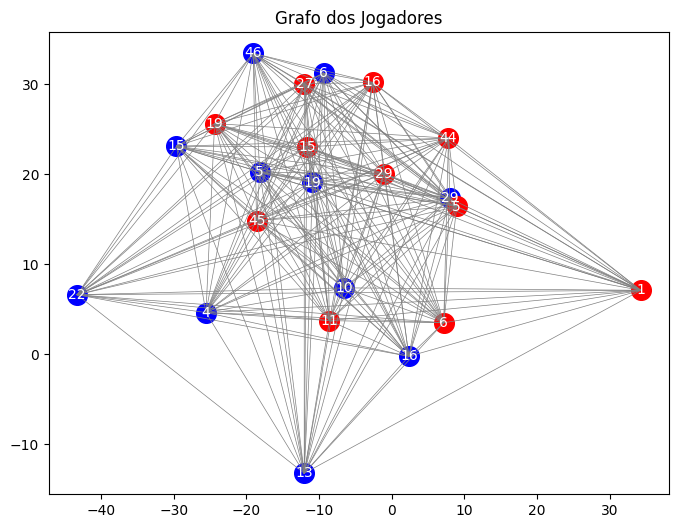

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Desenhar as arestas
for u, v in grf.edges():
    x1, y1 = grf.nodes[u]['x'], grf.nodes[u]['y']
    x2, y2 = grf.nodes[v]['x'], grf.nodes[v]['y']

    # Desenha a linha entre os nós
    plt.plot([x1, x2], [y1, y2], color='grey', linewidth=0.5)

# Desenhar os nós (com cores diferentes)
for i, attr in grf.nodes(data=True):
    x, y = attr['x'], attr['y']
    jersey_num = int(attr['num'])
    cor = 'blue' if i < 11 else 'red'

    # Desenha o círculo (representando o jogador)
    plt.scatter(x, y, color=cor, s=200)  # s=100 é o tamanho da bola

    # Adiciona o número dentro do círculo
    plt.text(x, y, str(jersey_num), color='white', ha='center', va='center', fontsize=10)

# Exibir o gráfico
plt.title("Grafo dos Jogadores")
plt.show()


## Questão 3
Adicione a bola no grafo. Faça qualquer modificação que julgar necessária ou válida (exemplo, conectar apenas jogadores à bola).

JUSTIFIQUE as mudanças e a escolha da forma de inserção da bola no grafo.

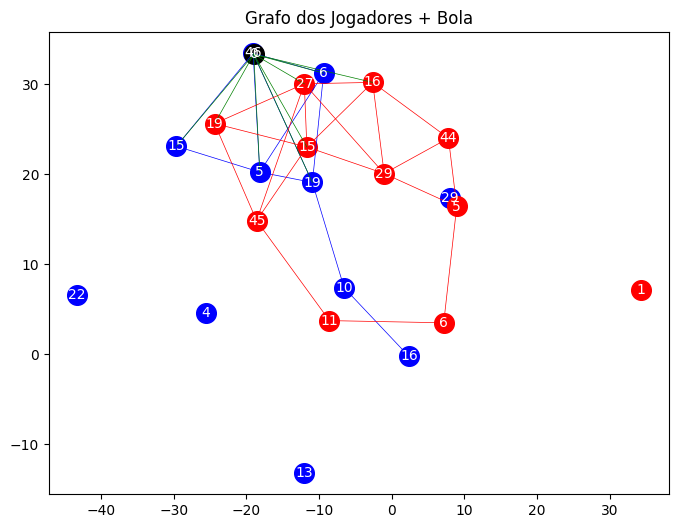

In [9]:
# Desenhar o grafo
plt.figure(figsize=(8, 6))

# Desenhar as arestas
for u, v, data in grf.edges(data=True):
    x1, y1 = grf.nodes[u]['x'], grf.nodes[u]['y']
    x2, y2 = grf.nodes[v]['x'], grf.nodes[v]['y']

    # Verde se conecta à bola
    if u == bola_idx or v == bola_idx:
        cor_aresta = 'green'
    # Azul se ambos < 11
    elif u < 11 and v < 11:
        cor_aresta = 'blue'
    # Vermelho se ambos ≥ 11
    elif u >= 11 and v >= 11:
        cor_aresta = 'red'
    else:
        cor_aresta = 'gray'  # fallback, mas não deve ocorrer

    plt.plot([x1, x2], [y1, y2], color=cor_aresta, linewidth=0.5)

# Desenhar os nós
for i, attr in grf.nodes(data=True):
    x, y = attr['x'], attr['y']
    jersey_num = int(attr['num'])

    if i == bola_idx:
        cor = 'black'  # Bola em preto
    else:
        cor = 'blue' if i < 11 else 'red'

    plt.scatter(x, y, color=cor, s=200)
    plt.text(x, y, str(jersey_num), color='white', ha='center', va='center', fontsize=10)

plt.title("Grafo dos Jogadores + Bola")
plt.show()

O grafo fica extremamente poluído utilizando arestas entre todos os vértices, por tanto, para melhor visualização da estrutura de jogo e a própria visualização, algumas mudanças foram feitas como:

- Adicionar a bola como um círculo, com cor singular
- Adicionar arestas apenas entre jogadores do mesmo time que estejam a uma distância arbitrária (17 unidades de distância)
- Adicionar arestas entre jogadores dos diferentes times à bola (desde que estejam dentro do raio estabelecido a cima)
- Cor dos vértices e arestas do time 1: azul, time 2: vermelho, bola: cinza(vértice) / verde (arestas)